In [1]:
from google.colab import files
uploaded = files.upload()

Saving Top view.png to Top view.png


In [2]:
uploaded2 = files.upload()

Saving north.jpg to north.jpg


In [3]:
uploaded3 = files.upload()

Saving coins.png to coins.png


Question 1

In [14]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
import math
from google.colab.patches import cv2_imshow

In [5]:
top_view = cv2.imread("Top view.png",0)
coins = cv2.imread("coins.png",0)
north = cv2.imread("north.jpg",0)

In [6]:
def zero_cross_detection(image):
    z_c_image = np.zeros(image.shape)

    for i in range(0,image.shape[0]-1):
        for j in range(0,image.shape[1]-1):
            if image[i][j]>0:
                if image[i+1][j] < 0 or image[i+1][j+1] < 0 or image[i][j+1] < 0:
                  z_c_image[i][j] = image[i][j]
            elif image[i][j] < 0:
                if image[i+1][j] > 0 or image[i+1][j+1] > 0 or image[i][j+1] > 0:
                  z_c_image[i][j] = image[i][j]
    return z_c_image

def plot_input(img, title):
    plt.imshow(img, cmap = 'gray')
    plt.title(title), plt.xticks([]), plt.yticks([])
    plt.show()
    
def handle_img_padding(img1, img2):
    M1, N1 = img1.shape[:2]
    M2, N2 = img2.shape[:2]
    padding_x = np.abs(M2 - M1)/2
    padding_y = np.abs(N2 - N1)/2
    img2 = img2[padding_x:M1+padding_x, padding_y: N1+padding_y]
    return img2
  

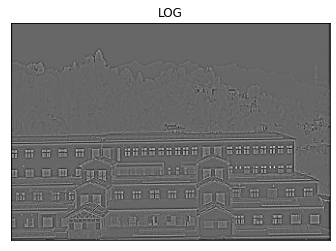

In [8]:
LoG_kernel = np.array([
                        [0, 0,  1, 0, 0],
                        [0, 1,  2, 1, 0],
                        [1, 2,-16, 2, 1],
                        [0, 1,  2, 1, 0],
                        [0, 0,  1, 0, 0]
                    ])

from scipy.signal import convolve2d

north_gaus = convolve2d(north, LoG_kernel,"same")
plot_input(north_gaus,'LOG')

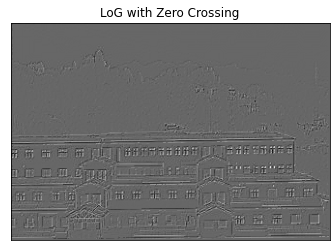

In [9]:
zero_crossing_log = zero_cross_detection(north_gaus)
plot_input(zero_crossing_log,'LoG with Zero Crossing')

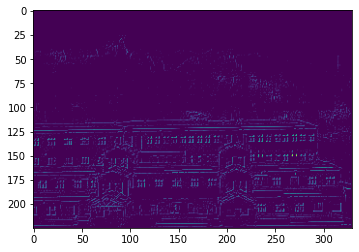

In [15]:
th = 0.04 * np.amax(zero_crossing_log)
th_img = np.zeros(zero_crossing_log.shape)

for i in range(zero_crossing_log.shape[0]):
  for j in range(zero_crossing_log.shape[1]):
    if zero_crossing_log[i][j] > th:
      th_img[i][j] = zero_crossing_log[i][j]
    else:
      th_img[i][j] = 0

plt.imshow(th_img)

Question 2

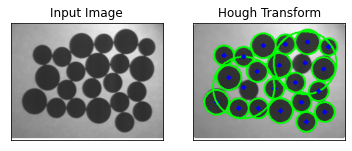

In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

bgr_img = cv2.imread('coins.png')

if bgr_img.shape[-1] == 3:          
    b,g,r = cv2.split(bgr_img)       
    rgb_img = cv2.merge([r,g,b])     
    gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)
else:
    gray_img = bgr_img

img = cv2.medianBlur(gray_img, 5)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)

circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,20,
                            param1=50,param2=30,minRadius=0,maxRadius=0)

circles = np.uint16(np.around(circles))

for i in circles[0,:]:
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

plt.subplot(121),plt.imshow(rgb_img)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(cimg)
plt.title('Hough Transform'), plt.xticks([]), plt.yticks([])
plt.show()

Question 3

In [17]:
uploaded4 = files.upload()

Saving pisa.jpg to pisa.jpg


In [18]:
rand_img = cv2.imread("pisa.jpg",0)
resized_img = cv2.resize(rand_img,(64,64))

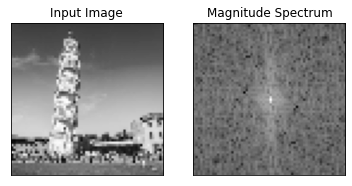

In [19]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import copy


img = copy.deepcopy(resized_img)
img_float32 = np.float32(img)

dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()         


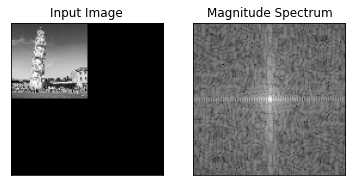

In [20]:
z = np.zeros((64,64))
img1 = np.append(resized_img,z,axis = 0)

img1 = img1.tolist()
for i in range(len(img1)):
  for j in range(64):
    img1[i].append(0)
img1 = np.array(img1)
img = copy.deepcopy(img1)
img_float32 = np.float32(img)

dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()  

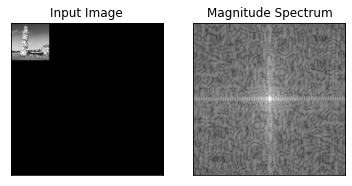

In [21]:
z = np.zeros((128,128))
img2 = np.append(img1,z,axis = 0)

img2 = img2.tolist()
for i in range(len(img2)):
  for j in range(128):
    img2[i].append(0)
img2 = np.array(img2)

img = copy.deepcopy(img2)
img_float32 = np.float32(img)

dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()   

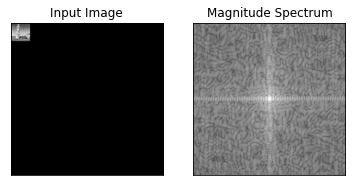

In [22]:
z = np.zeros((256,256))
img3 = np.append(img2,z,axis = 0)

img3 = img3.tolist()
for i in range(len(img3)):
#  img1[i] = img1[i].tolist()
  for j in range(256):
    img3[i].append(0)
img3 = np.array(img3)
#cv2_imshow(img1)

img = copy.deepcopy(img3)
img_float32 = np.float32(img)

dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show() 

Question 4

(Text(0.5, 1.0, 'HF Image'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

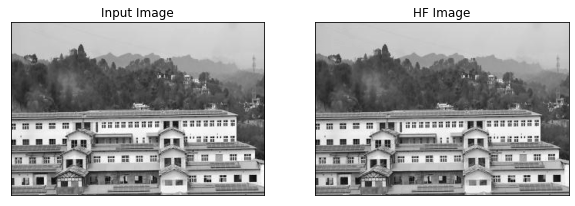

In [23]:
img = copy.deepcopy(north).astype(float)
img_og_norm = (img - np.amin(img))/(np.amax(img) - np.amin(img))
dft = np.fft.fft2(img)
dft_shift = np.fft.fftshift(dft)
rows, cols = img.shape
crow, ccol = rows//2 , cols//2 
mask = np.zeros((rows, cols), np.uint8) + 1
mask[crow-120:crow+120, ccol-120:ccol+120] = 0
fshift = dft_shift * mask
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
plt.figure(figsize=(10,10))
plt.subplot(121),plt.imshow(img_og_norm, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])

img_res = img + img_back
img_res = (img_res - np.amin(img_res))/(np.amax(img_res) - np.amin(img_res))
img_res = 255 * img_res

plt.subplot(122),plt.imshow(np.real(img_res), cmap = 'gray')
plt.title('HF Image'), plt.xticks([]), plt.yticks([])

/usr/local/lib/python3.8/dist-packages/google/colab/patches/__init__.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


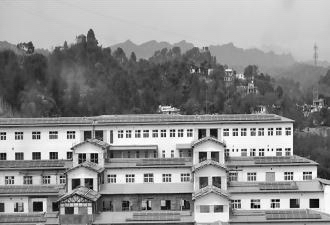

In [24]:
cv2_imshow(img_back)